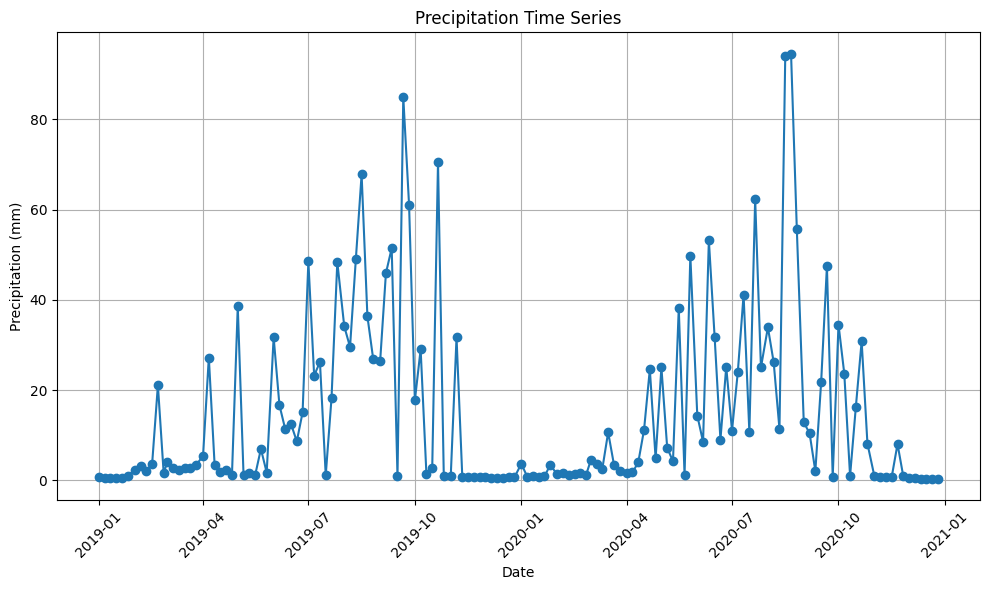

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

plt.figure(figsize=(10, 6))
plt.plot(data['system:time_start'], data['mm'], marker='o', linestyle='-')
plt.title('Precipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


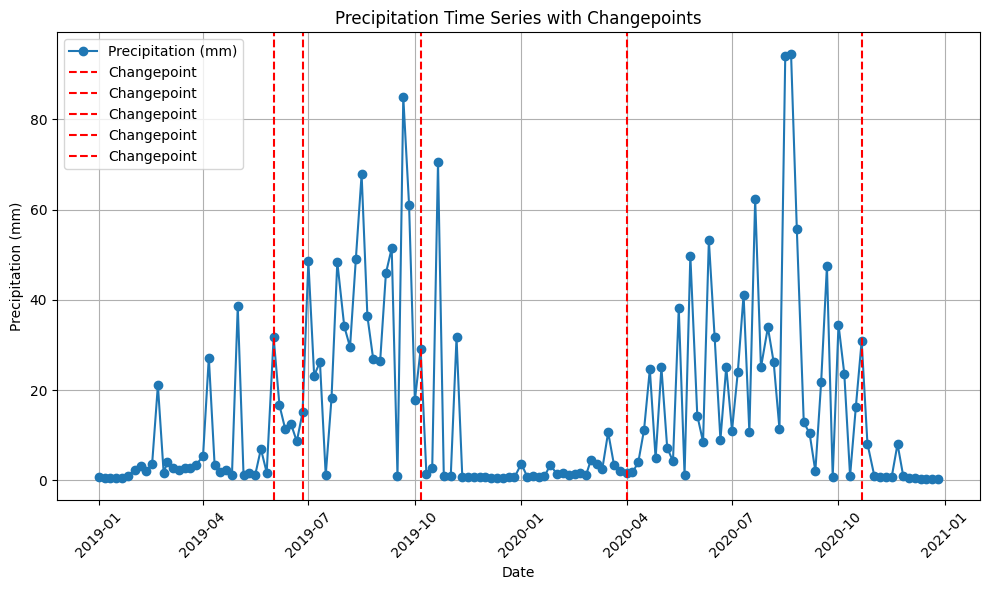

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])
data.set_index('system:time_start', inplace=True)

time_series_data = data['mm']

signal = time_series_data.values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(signal)
result = algo.predict(n_bkps=5)  

fig, ax = plt.subplots(figsize=[10, 6])
ax.plot(time_series_data.index, time_series_data.values, label='Precipitation (mm)', marker='o')
ax.set_title('Precipitation Time Series with Changepoints')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')

for cp in result:
    if cp < len(time_series_data):
        ax.axvline(time_series_data.index[cp], color='r', linestyle='--', label='Changepoint')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


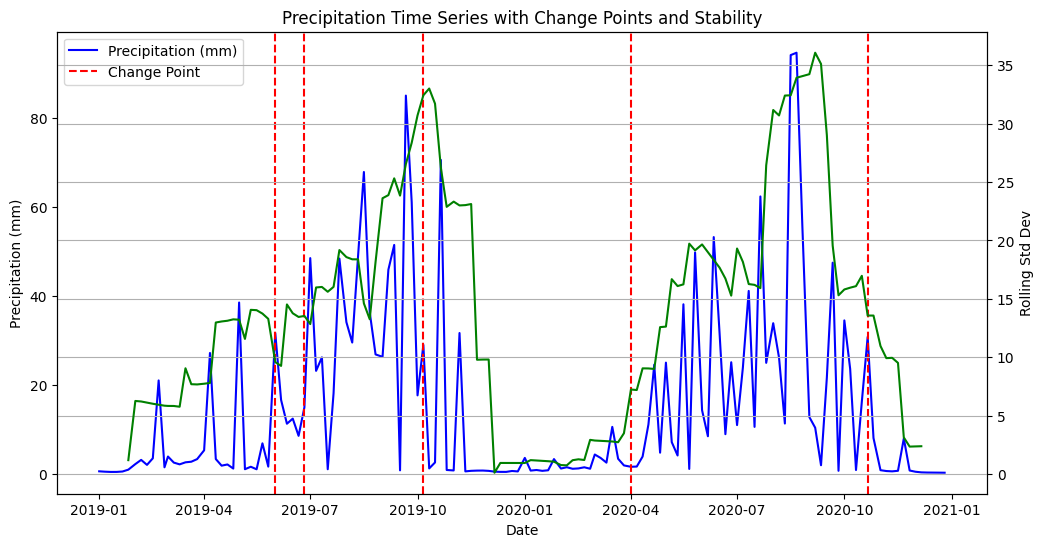

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])
data.set_index('system:time_start', inplace=True)

time_series_data = data['mm']

signal = time_series_data.values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(signal)
result = algo.predict(n_bkps=5) 
window_size = 10 
rolling_std = time_series_data.rolling(window=window_size,center=True).std()

fig, ax = plt.subplots(figsize=[12, 6])
ax.plot(time_series_data.index, time_series_data.values, label='Precipitation (mm)', color='blue')

ax2 = ax.twinx()
ax2.plot(rolling_std.index, rolling_std, label='Rolling Std Dev', color='green')

for cp in result:
    if cp < len(time_series_data):
        ax.axvline(time_series_data.index[cp], color='red', linestyle='--', label='Change Point')

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())
ax.set_title('Precipitation Time Series with Change Points and Stability')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')
ax2.set_ylabel('Rolling Std Dev')
plt.grid()
plt.show()


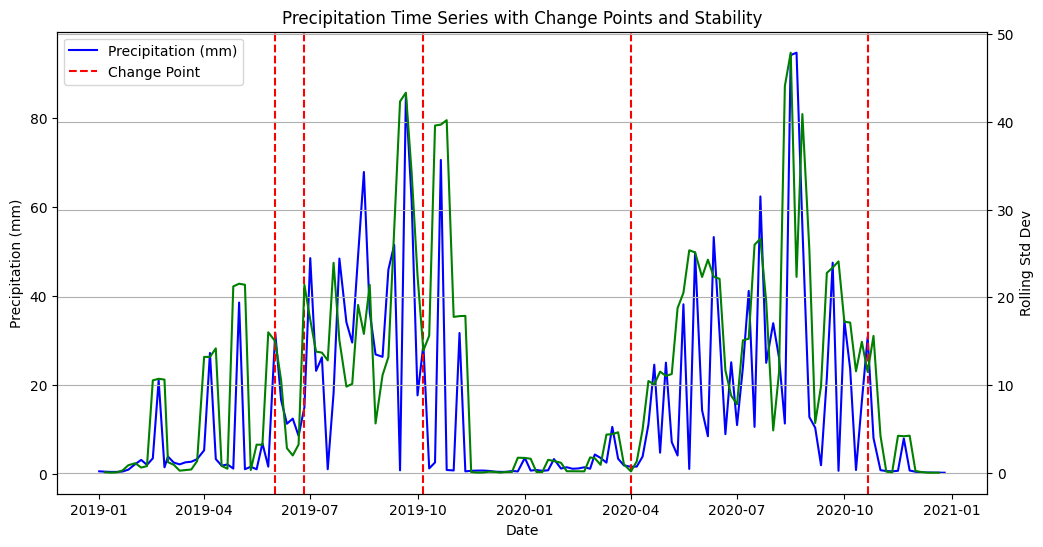

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv' 
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])
data.set_index('system:time_start', inplace=True)

time_series_data = data['mm']

signal = time_series_data.values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(signal)
result = algo.predict(n_bkps=5)  

window_size = 3  
rolling_std = time_series_data.rolling(window=window_size,center=True).std()

fig, ax = plt.subplots(figsize=[12, 6])
ax.plot(time_series_data.index, time_series_data.values, label='Precipitation (mm)', color='blue')

ax2 = ax.twinx()
ax2.plot(rolling_std.index, rolling_std, label='Rolling Std Dev', color='green')

for cp in result:
    if cp < len(time_series_data):
        ax.axvline(time_series_data.index[cp], color='red', linestyle='--', label='Change Point')

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())
ax.set_title('Precipitation Time Series with Change Points and Stability')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')
ax2.set_ylabel('Rolling Std Dev')
plt.grid()
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_7236\2494620484.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['mm'].resample('M').sum()


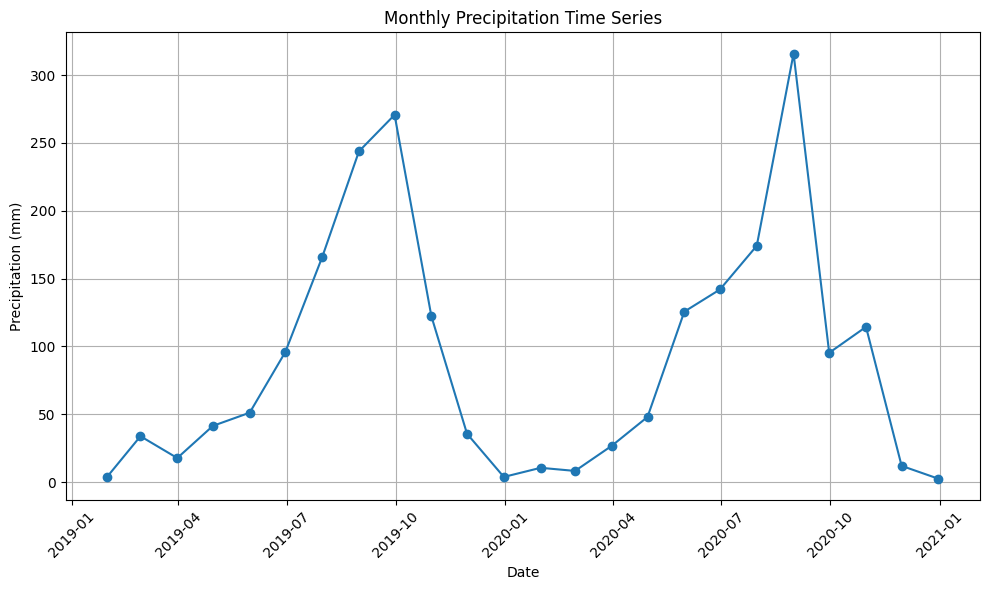

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data['mm'].resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-')
plt.title('Monthly Precipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


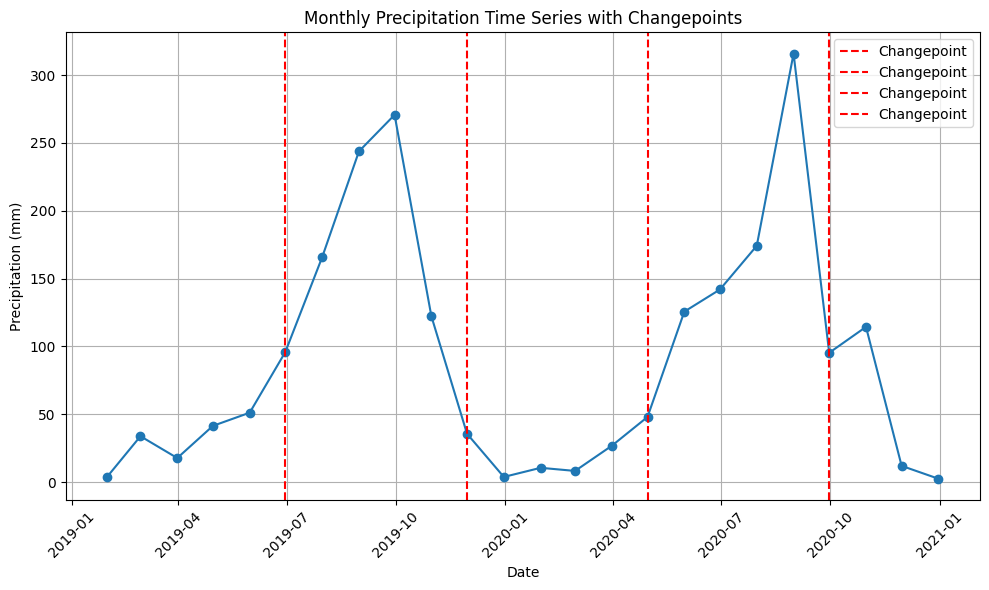

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data['mm'].resample('ME').sum()

signal = monthly_data.values

model = "l2"  
algo = rpt.Binseg(model=model).fit(signal)
penalty = 10  # Penalty value (can be adjusted)
result = algo.predict(pen=penalty)

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-')
for breakpoint in result[:-1]:  
    plt.axvline(monthly_data.index[breakpoint], color='r', linestyle='--', label='Changepoint')
plt.title('Monthly Precipitation Time Series with Changepoints')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


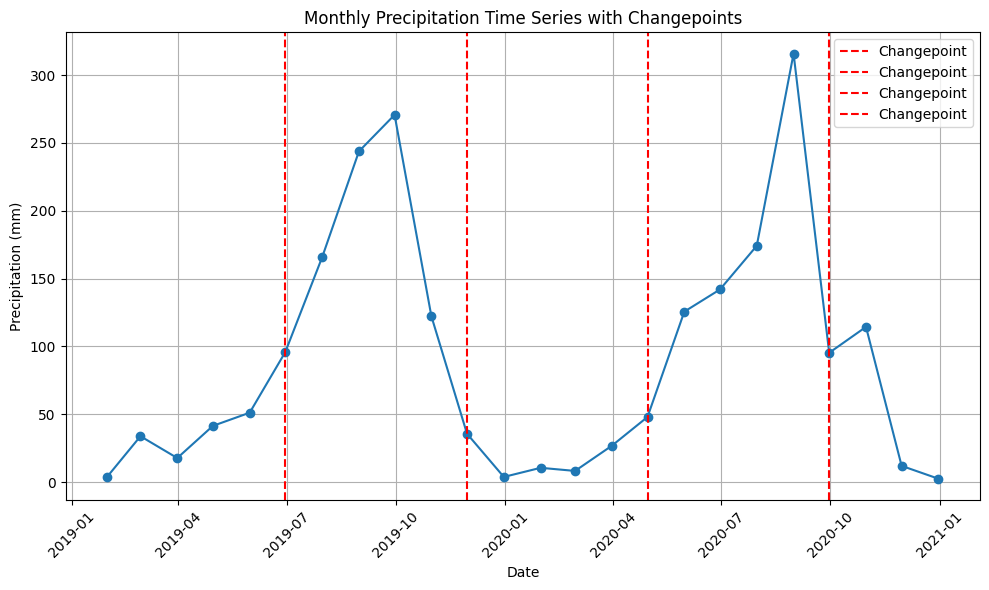

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv' 
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data['mm'].resample('ME').sum()

monthly_data = monthly_data.interpolate(method='time')

signal = monthly_data.values

model = "l2"  
algo = rpt.Binseg(model=model).fit(signal)
penalty = 10  
result = algo.predict(pen=penalty)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-')
for breakpoint in result[:-1]: 
    plt.axvline(monthly_data.index[breakpoint], color='r', linestyle='--', label='Changepoint')
plt.title('Monthly Precipitation Time Series with Changepoints')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


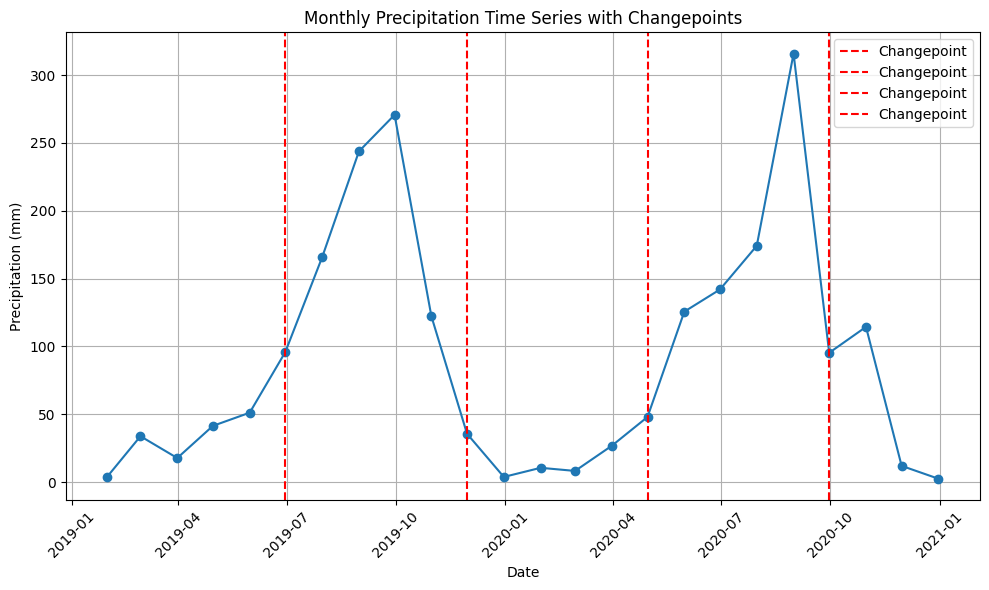

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data['mm'].resample('ME').sum()

monthly_data = monthly_data.interpolate(method='time')

modified_csv_file_path = 'modified_rainfalltimeseries.csv'
monthly_data.to_csv(modified_csv_file_path)

signal = monthly_data.values

model = "l2"  
algo = rpt.Binseg(model=model).fit(signal)
penalty = 10 
result = algo.predict(pen=penalty)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-')
for breakpoint in result[:-1]:  
    plt.axvline(monthly_data.index[breakpoint], color='r', linestyle='--', label='Changepoint')
plt.title('Monthly Precipitation Time Series with Changepoints')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


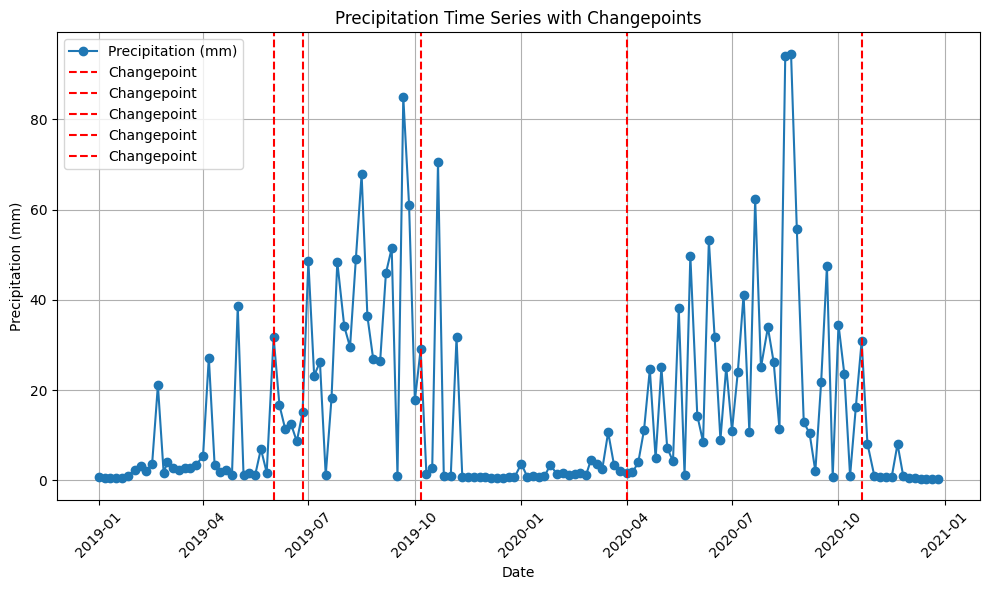

Changepoints detected at the following dates:
 DatetimeIndex(['2019-06-01', '2019-06-26', '2019-10-06', '2020-04-01',
               '2020-10-21'],
              dtype='datetime64[ns]', name='system:time_start', freq=None)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

csv_file_path = 'rainfalltimeseries.csv'  
data = pd.read_csv(csv_file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])
data.set_index('system:time_start', inplace=True)

time_series_data = data['mm']

signal = time_series_data.values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(signal)
result = algo.predict(n_bkps=5)  
# Plot the results
fig, ax = plt.subplots(figsize=[10, 6])
ax.plot(time_series_data.index, time_series_data.values, label='Precipitation (mm)', marker='o')
ax.set_title('Precipitation Time Series with Changepoints')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')

for cp in result:
    if cp < len(time_series_data):
        ax.axvline(time_series_data.index[cp], color='r', linestyle='--', label='Changepoint')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

changepoint_dates = time_series_data.index[result[:-1]]
print("Changepoints detected at the following dates:\n", changepoint_dates)
